# 自分の網膜上の錐体分布を実感してみる('24.05.23)

## 視線の先に移動する!?不思議な黒点

次の図は、線が縦横斜めに走る、普通の格子模様に見えます。
けれど、片目をつぶって眺めると、眺めているところにだけ「黒い点」が見えるはず。
視線を移動させれば、さっきまで見えていたはずの黒い点は消えて、新たに眺めた先にまた黒い点が現れます。

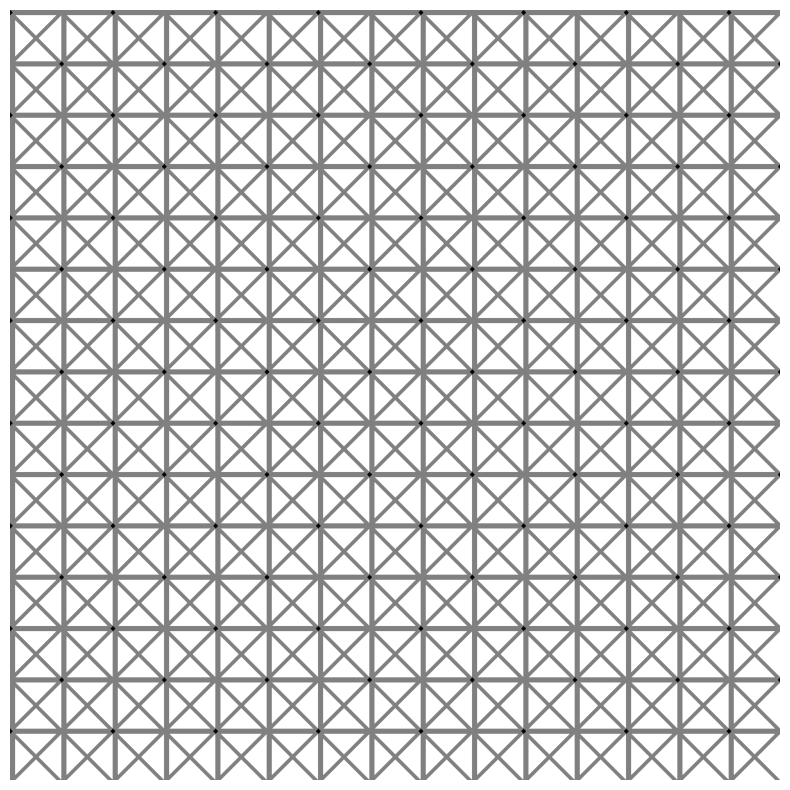

In [147]:
import numpy as np
import matplotlib.pyplot as plt

w,h=(1200,1200)
grid_gap_pix=80  # 格子模様の間隔（ピクセル）
grid_width_pix=8 # 格子模様の幅（ピクセル）
dot_width=8      # 黒点の大きさ
dot_cycle=2      # 黒点を、格子何個ごとに描くか

# 画像の配列を作る
img=np.ones((h,w))

for y in range(h):
    for x in range(w):
        # 縦横の模様を描く
        if y%grid_gap_pix < grid_width_pix \
          or x%grid_gap_pix < grid_width_pix:
            img[y,x]=0.5
        # 斜めの線を描く
        if (y-x)%grid_gap_pix < grid_width_pix \
          or (y+x)%grid_gap_pix < grid_width_pix:
            img[y,x]=0.5
        # 黒点を描く
        if abs((y-x)%(dot_cycle*grid_gap_pix)) < dot_width \
          and abs((y+x)%(dot_cycle*grid_gap_pix)) < dot_width:
            img[y,x]=0.0
img[0,0]=0.0

fig=plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

## 細かなものは、眺めている場所でしか見えない

眺めているところだけに現れる「黒点」は格子模様の全面に描かれています。
けれど、人の視覚は「見ている場所、そのピンポイントの場所でしか、細かいものを見分けることはできない」ものです。
だから、眺めている場所以外の黒点は見えなくなり、視線の移動に沿って「眺めているところにだけに黒点が現れる」というわけです。

明るい場所で色や模様を見分ける光センサーは、網膜の錐体(Cone)です。
下図は、網膜上の錐体と桿体(Rod)の分布を表したグラフです。
ちなみに、桿体は、暗いところで使われる光センサーです。

このグラフを眺めると、錐体があるのは、目の中心部分周辺、角度にして2度くらいの場所だということがわかります。
それ以外の場所では、錐体の数はとても少なくなり、ほとんどが桿体になります。
それはつまり、明るいところでの「視力」は、目の中心部だけは良いけれど、それ以外の場所は「ほとんどボケてしか見えない」ということになります。
だから、視線の先に移動する不思議な黒点が生じます。

%<img style="float:center;transform: rotate(0deg); height:10cm" src="./images/day_240523_numpy_vision_Distribution_of_Cones_and_Rods_on_Human_Retina.png" />

```{figure} ./images/day_240523_numpy_vision_Distribution_of_Cones_and_Rods_on_Human_Retina.png
---
height: 10cm
---
網膜上の錐体と桿体(Rod)の分布
```

## 注視している場所しか「見えない」ことを実感する

下の図は、細かな斜線を描いた図です。
中央の黒点を片目で眺め、眺める距離を変化させると、「眺めている黒点」の周囲に斜線が見えるけれど、その外側は「ただの均一な灰色ベタ」に見えるはずです。

つまり、斜線が見えている領域は「錐体がある程度の数存在している場所」で、ノッペリとした灰色に見えている領域は「錐体の数がかなり少ない場所」というわけです。

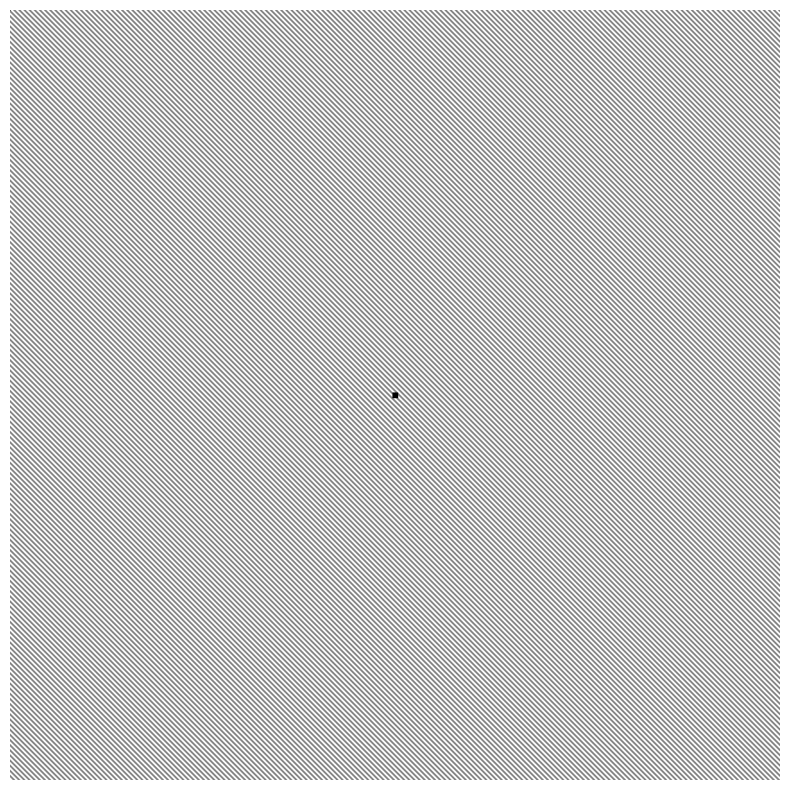

In [148]:
grid_gap_pix=8
grid_width_pix=4

img=np.ones((h,w))
for y in range(h):
    for x in range(w):
        if (y-x)%grid_gap_pix < grid_width_pix:
            img[y,x]=0.5
        if abs(y-h/2)<5 and abs(x-w/2)<5:
            img[y,x]=0.0
img[0,0]=0.0

fig=plt.figure(figsize=[10,10])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

下図は、網膜中央での錐体分布を図示した例です。
赤緑青に色付けされているのは、赤色・緑色・青色の識別に対応するL錐体・M錐体・S錐体と呼ばれる、色を感じる3種の光センサーです。

錐体がどのように分布するかは、人それぞれ千差万別なので、これはあくまで一例にすぎませんが、左がわりと平均的な特性例です。
ちなみに、右側は赤と緑を識別しにくいタイプの色覚特性の例になります。

この図を眺めると「赤色・緑色・青色ごとに、ものを見分けることができる解像度は違いそう」とか「青色の光センサーは中心部に少ないから、青色は眺めているところの視力は意外に低いかもしれない」といったことに気づくはずです。

%<img style="float:center;transform: rotate(0deg); height:8cm" src="./images/day_240523_numpy_vision_ConeMosaics.jpg" />

```{figure} ./images/day_240523_numpy_vision_ConeMosaics.jpg
---
height: 8cm
---
網膜中央の錐体（左右は色覚特性が異なる例）
```

そこで、赤色・緑色・青色ごとに、注視している部分とそれ以外の周辺領域の「視力の違い」を確認してみましょう。
それぞれ、片目で中央の黒点を眺め、眺める距離を変化させてみましょう。

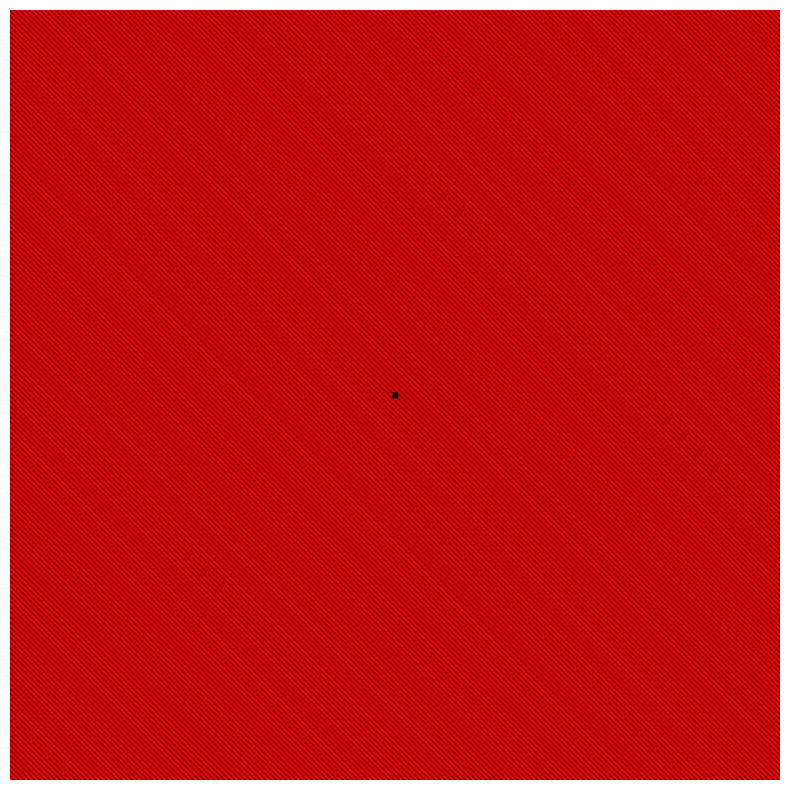

In [149]:
color_img=np.zeros((h,w,3))
color_img[:,:,0]=img

fig=plt.figure(figsize=[10,10])
plt.imshow(color_img)
plt.axis('off')
plt.show()

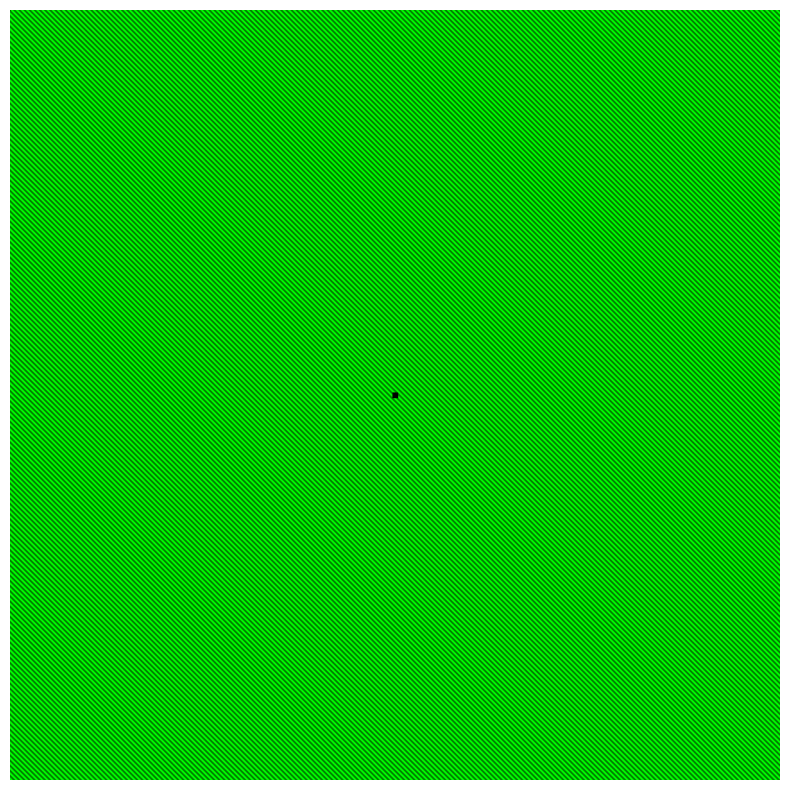

In [150]:
color_img=np.zeros((h,w,3))
color_img[:,:,1]=img

fig=plt.figure(figsize=[10,10])
plt.imshow(color_img)
plt.axis('off')
plt.show()

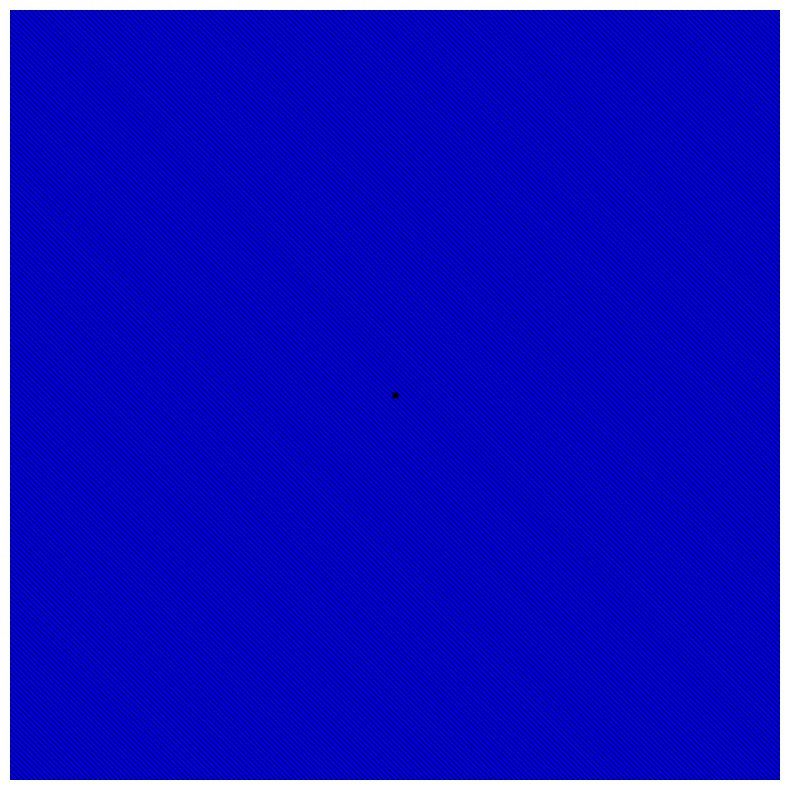

In [141]:
color_img=np.zeros((h,w,3))
color_img[:,:,2]=img

fig=plt.figure(figsize=[10,10])
plt.imshow(color_img)
plt.axis('off')
plt.show()

どうでしょうか？

人によって、錐体分布は千差万別なので、それぞれの錐体分布個性に応じた見え方となったことでしょう。
たとえば、

- 赤色と緑色では注視している部分だけ斜線が見えて、青色では注視している部分は逆にノッペリと見えた

という人もいれば、そうでない人もいるはずです。

さまざまな模様を作り、自分の視覚がそれをどう認識するかを調べ、自分の目が備えている光センサーの分布や特性を眺めてみると面白いかもしれません。